# K-Means Clustering

**K-Means Clustering** is a *unsupervised* clustering machine learning algorithm. It finds clusters in data based on the data attributes alone (not the labels).

K-Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

<u>**The K-Means Algorithm: Expectation Maximization**</u>

K-Means is an example of an algorithm which uses an *Expectation-Maximization* approach to arrive at the solution.
*Expectation-Maximization* is a two-step approach which works as follows:

1. Guess some cluster centers
2. Repeat until converged
   A. Assign points to the nearest cluster center
   B. Set the cluster centers to the mean 
  
This algorithm will (often) converge to the optimal cluster centers.

<u>**K-Means Caveats**</u>

The convergence of this algorithm is not guaranteed; for that reason, scikit-learn by default uses a large number of random initializations and finds the best results.

Also, the number of clusters must be set beforehand... there are other clustering algorithms for which this requirement may be lifted.

<u>**Table of Contents**</u>
 - <a href="#E1">Example 1: Generated Data</a>
 - <a href="#E2">Example 2: Digits</a>
 - <a href="#E3">Example 3: Colour Compression</a>

#### Installing necessary libraries

In [1]:
#!pip install numpy
#!pip install matplotlib
#!pip install scipy
#!pip install seaborn
#!pip install sklearn

#### Importing necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

## <a name="E1">Example 1: Generated Data</a>
Let's take a look at how KMeans operates on a simple cluster. To emphasize that this is unsupervised, we'll not plot the color of the clusters:

### Generate data to cluster

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(
    n_samples = 300,  # number of datapoints to generate
    centers = 4, # How many cluster centers
    cluster_std  = 0.60, # Standard deviation for each cluster
    random_state = 0 # Set seed so clusters are same for everyone
)

#### Plot the generated data

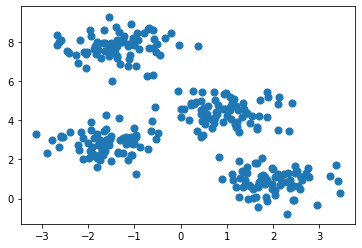

In [4]:
plt.scatter(X[:,0],X[:,1],s=50)

By eye, it is relatively easy to pick out the four clusters. If you were to perform an exhaustive search for the different segmentations of the data, however, the search space would be exponential in the number of points. Fortunately, there is a well-known *Expectation Maximization (EM)* procedure which scikit-learn implements, so that KMeans can be solved relatively quickly.

### Apply K-Means Algorithm

#### Build model for prediction
There are 4 clusters, so we will build a model for 4 clusters.

In [5]:
model = KMeans(4) # Since there are 4 clusters

#### Train model

In [6]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Make predictions

In [7]:
y_pred = model.predict(X)

#### Plot predicted clusters

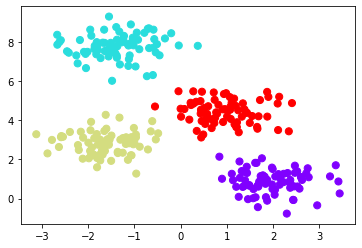

In [8]:
plt.scatter(X[:,0], X[:,1], c=y_pred, s=50, cmap='rainbow')

The KMeans algorithm identifies the four cluster of points in a manner very similar to what we would do by eye!

## <a name="E2">Example 2: Digits</a>
For a closer-to-real-world example, let's again take a look at the digits data. Here we'll use KMeans to automatically cluster the data in 64 dimensions, and then look at the cluster centers to see what the algorithm has found.

### Import digit data

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()

#### View sample data
The data that we imported is a set of images of written numbers. The data is provided in 64 bit vector format, and must be reshaped to 8x8 to be properly viewed as an image. Below we can see 10 random number images from the dataset:

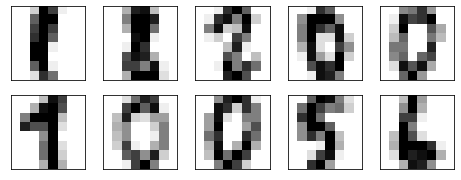

In [10]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    indx = np.random.randint(0,len(digits.data))
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(digits.data[indx].reshape((8,8)), cmap=plt.cm.binary)

### Apply K-Means Algorithm

#### Build model
Here we will build a `sklearn KMeans` model with 10 possible clusters (0-9):

In [11]:
model = KMeans(n_clusters=10)

#### Train & predict

In [12]:
clusters = model.fit_predict(digits.data)

### Evaluate generated clusters

#### Shape of clusters

In [13]:
model.cluster_centers_.shape

(10, 64)

We see that there are 10 clusters in 64 dimensions. 

#### Visualize clusters
Let's visualize each of these cluster centers to see what they represent. The 64 size vector is reshaped into a 8x8, and visualized using matplotlib.

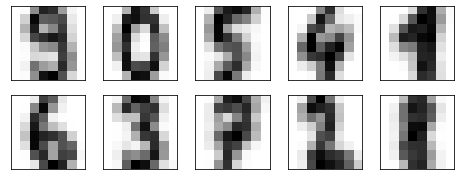

In [14]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

From above we can see that even *without label*, KMeans is able to find clusters whose mean are recognizable as digits (with apologies to number 8!).

#### Plot results with PCA
For good measure, let's use our PCA visualization and look at the true cluster labels and the K-means cluster labels. PCA is a dimensionality reduction technique which will allow us to plot the results in 2D.

Set labels:

In [15]:
labels = np.zeros_like(clusters) # Create an array of 0s with equal length ot the number of clusters

# Set labels based on the modes of the target
for i in range(10):
    mask = (clusters == i)
    labels[mask] = stats.mode(digits.target[mask])[0]
print (labels)

[0 8 8 ... 8 9 9]


Apply PCA to reduce dimensions to 2D:

In [16]:
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(digits.data)

Plot clusters from PCA and true labels:

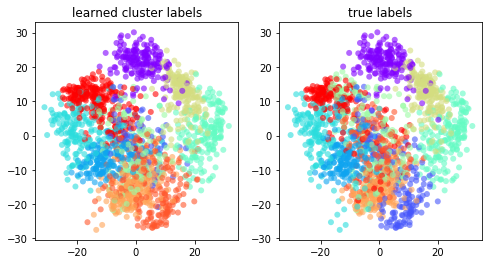

In [17]:
kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10),
              edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('learned cluster labels')

ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('true labels');

#### Evaluate accuracy of model


Accuracy:

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)*100.0

79.41012799109627

Confusion Matrix:

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 156   0   2   0   6   7  12]
 [  0   3   0   0 166   0   0  10   2   0]
 [  0   0   0   2   2 136   1   0   0  41]
 [  1   0   0   0   0   0 177   0   3   0]
 [  0   2   0   0   0   4   0 171   2   0]
 [  0   6   3   2   0   4   2   5 102  50]
 [  0  20   0   6   0   6   0   8   1 139]]


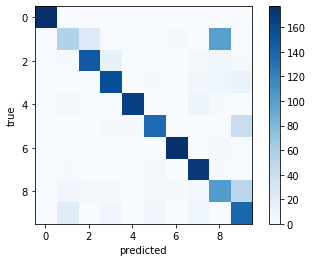

In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(digits.target, labels))

plt.imshow(confusion_matrix(digits.target, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

The model had some trouble classifying 8s, and 9s was able to acheived a classification accuracy of 80% without being given any labels.

## <a name="E2">Example 3: Colour Compresion</a>
One interesting application of clustering is in color image compression. For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and conversely a large number of pixels will have similar or identical colors.

Scikit-learn has a number of images that you can play with, accessed through the datasets module. For example:

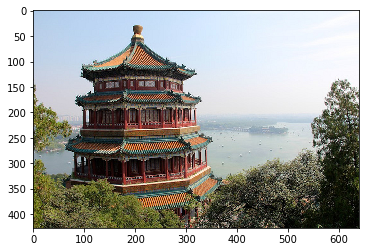

In [20]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

# Show image
plt.imshow(china)
plt.grid(False)

In [21]:
#from sklearn.datasets import load_sample_image
china1 = load_sample_image('china.jpg')   
#china.dtype                              
china.shape    

(427, 640, 3)

### Rescale & Flatten image

We can see the shape of the image using the `shape` parameter of the the ndarray

In [22]:
china.shape

(427, 640, 3)

The image above is 640 x 427 and has 3 channels corresponding to Red, Green, and Blue (RGB).

We want to rescale the colors in this image so they lie between 0 and 1 (normalize), and then reshape the array into a vector for typical scikit-learn style input:

This is an 8 bit image so the color values range between 0 and 255.

#### Rescale

In [23]:
X = china / 255.0
X[0:5,0:5,1] # show sample

array([[0.78823529, 0.78823529, 0.78823529, 0.78823529, 0.78823529],
       [0.78039216, 0.78431373, 0.78431373, 0.78823529, 0.78823529],
       [0.78823529, 0.78823529, 0.78823529, 0.78823529, 0.78823529],
       [0.79215686, 0.79215686, 0.79215686, 0.79215686, 0.78823529],
       [0.78823529, 0.78823529, 0.79215686, 0.79215686, 0.79215686]])

In [24]:
X = X.reshape(-1,3)
X.shape

(273280, 3)

In [25]:
427*640

273280

We now have $427 \times 640 = 273,280$ points in 3 dimensions.

Our task is to use KMeans to compress the $256^3$ colors into a smaller number (say, 64 colors). Basically, we want to find $N_{color}$ clusters in the data, and create a new image where the true input color is replaced by the color of the closest cluster.

### Apply KMeans

#### Rescale image to decrease runtime

New image shape:  (143, 214, 3)


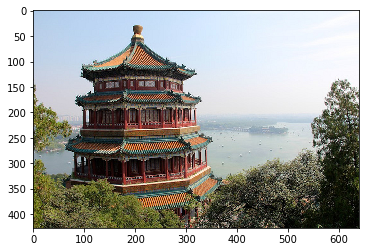

In [26]:
image = china[::3,::3]
print ("New image shape: ",image.shape)

# Show image
plt.imshow(china)
plt.grid(False)

#### Reshape and flatten image

In [27]:
X = (image/255.0).reshape(-1,3)

#### Build KMeans model
w/ 64 clusters corresponding to allowable number of colors

In [28]:
n_colors = 64
model = KMeans(n_colors)

#### Fit & predict with  model

In [29]:
labels = model.fit_predict(X)

#### Get new clustered image with binned colors

In [30]:
colors = model.cluster_centers_
new_image = colors[labels].reshape(image.shape)
new_image = (255 * new_image).astype(np.uint8)

#### Plot results

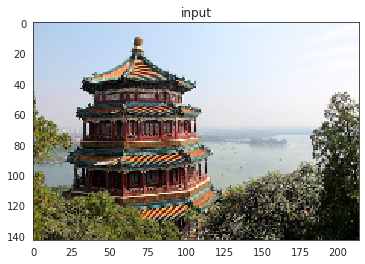

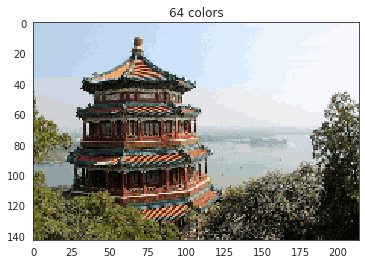

In [31]:
# create and plot the new image
with sns.axes_style('white'):
    plt.figure()
    plt.imshow(image)
    plt.title('input')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} colors'.format(n_colors))

Now we have reduced the $256^3$ possible colors to only 64. You can play with the n_colors paramter to reduce the number of allowable colors.